### Number Detection

In [189]:
from sklearn.datasets import load_digits

In [190]:
digits = load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [191]:
print(digits.target.shape)
print(digits.data.shape)
print(digits.images.shape)

(1797,)
(1797, 64)
(1797, 8, 8)


6


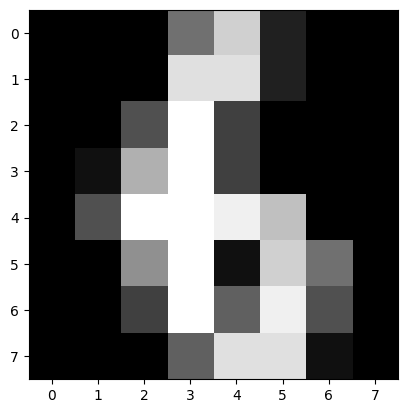

In [192]:
import matplotlib.pyplot as plt


x = digits.images[880]
print(digits.target[880])
plt.gray()
plt.imshow(x)
plt.show()

### Preprocessing

In [193]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3)


In [194]:
x_train[0]

array([ 0.,  0.,  1.,  9., 15., 10.,  1.,  0.,  0.,  0.,  2., 12.,  8.,
       12.,  4.,  0.,  0.,  0.,  0., 11.,  1., 11.,  3.,  0.,  0.,  0.,
        0.,  8.,  8., 15.,  4.,  0.,  0.,  2., 15., 16., 16.,  7.,  0.,
        0.,  0.,  2., 15.,  5., 11.,  0.,  0.,  0.,  0.,  0., 14.,  4.,
       12.,  0.,  0.,  0.,  0.,  0.,  3., 14.,  9.,  0.,  0.,  0.])

In [195]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler(feature_range=(0, 1))
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [196]:
x_train[0]

array([0.        , 0.        , 0.0625    , 0.5625    , 0.9375    ,
       0.625     , 0.0625    , 0.        , 0.        , 0.        ,
       0.125     , 0.75      , 0.5       , 0.75      , 0.25      ,
       0.        , 0.        , 0.        , 0.        , 0.6875    ,
       0.0625    , 0.6875    , 0.1875    , 0.        , 0.        ,
       0.        , 0.        , 0.5       , 0.5       , 0.9375    ,
       0.26666667, 0.        , 0.        , 0.14285714, 0.9375    ,
       1.        , 1.        , 0.4375    , 0.        , 0.        ,
       0.        , 0.125     , 0.9375    , 0.3125    , 0.6875    ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.875     , 0.25      , 0.75      , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.1875    , 0.875     ,
       0.5625    , 0.        , 0.        , 0.        ])

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA with 32 components
pca = PCA(n_components=32)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

print(f'Original features: 64')
print(f'Reduced features: {x_train.shape[1]}')
print(f'Explained variance ratio: {pca.explained_variance_ratio_.sum():.4f}')

In [ ]:
# Check the shape and first sample after PCA
print(f'Training data shape after PCA: {x_train.shape}')
print(f'Test data shape after PCA: {x_test.shape}')
print(f'First sample after PCA: {x_train[0][:10]}...')  # Show first 10 components

### Performance Metric

In [197]:
from sklearn.metrics import accuracy_score, precision_score, recall_score


def calculate_metrics(y_train, y_test, y_pred_train, y_pred_test):
    acc_train = accuracy_score(y_true=y_train, y_pred=y_pred_train)
    acc_test = accuracy_score(y_true=y_test, y_pred=y_pred_test)

    p = precision_score(y_true=y_test, y_pred=y_pred_test, average='weighted')
    r = recall_score(y_true=y_test, y_pred=y_pred_test, average='weighted')

    print(f'acc_train: {acc_train} - acc test: {acc_test} - precision: {p} - recall: {r}')

    return acc_train, acc_test, p, r

### Classification

### 1. Random Forest

In [198]:
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(max_depth=128, n_estimators=256)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=128, n_estimators=256)

In [199]:
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

acc_train_rf, acc_test_rf, p_rf, r_rf = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train: 1.0 - acc test: 0.9777777777777777 - precision: 0.9785971303736727 - recall: 0.9777777777777777


### 2. SVM

In [200]:
from sklearn.svm import SVC


svm = SVC(kernel='poly')
svm.fit(x_train, y_train)

SVC(kernel='poly')

In [201]:
y_pred_train = svm.predict(x_train)
y_pred_test = svm.predict(x_test)

acc_train_svm, acc_test_svm, p_svm, r_svm = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train: 0.9984089101034208 - acc test: 0.9907407407407407 - precision: 0.990988709507228 - recall: 0.9907407407407407


### 3. ANN

In [202]:
# from sklearn.neural_network import MLPClassifier


# ann = MLPClassifier(hidden_layer_sizes=256)
# ann.fit(x_train, y_train)

In [203]:
# y_pred_train = ann.predict(x_train)
# y_pred_test = ann.predict(x_test)

# acc_train_ann, acc_test_ann, p_ann, r_ann = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

In [204]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [205]:
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

acc_train_knn, acc_test_knn, p_knn, r_knn = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train: 0.9880668257756563 - acc test: 0.9814814814814815 - precision: 0.9817695974062304 - recall: 0.9814814814814815


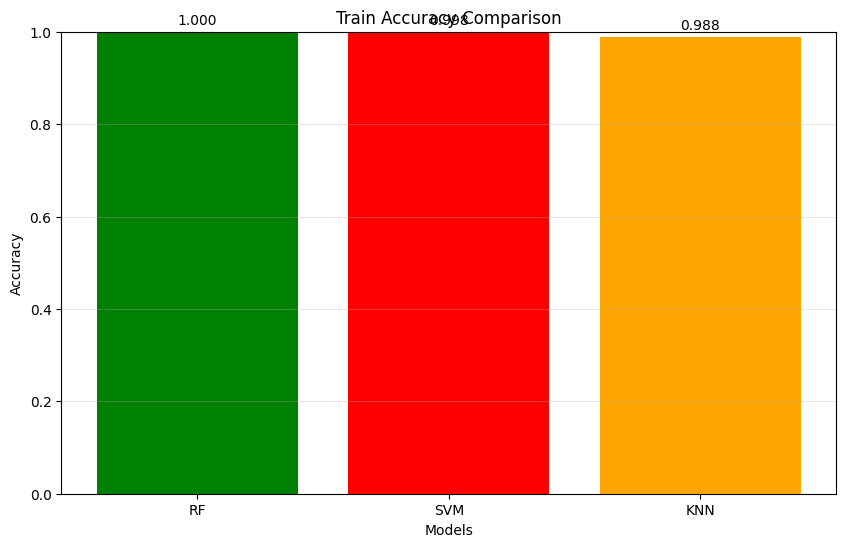

In [206]:
import matplotlib.pyplot as plt


acc_train = [acc_train_rf, acc_train_svm, acc_train_knn]
title = ['RF', 'SVM', 'KNN']

colors = ['green', 'red', 'orange']
plt.figure(figsize=(10, 6))
plt.title('Train Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.bar(title, acc_train, color=colors)
plt.grid(axis='y', alpha=0.3)
plt.ylim(0, 1)

# Add accuracy values on top of bars
for i, v in enumerate(acc_train):
    plt.text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')
plt.show()

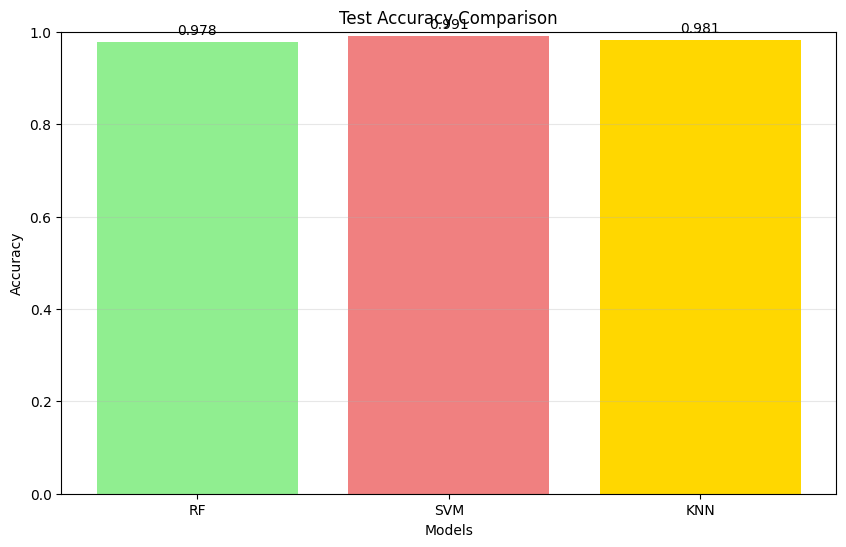

In [207]:
# Test Accuracy Comparison
acc_test = [acc_test_rf, acc_test_svm, acc_test_knn]
title = ['RF', 'SVM', 'KNN']

colors = ['lightgreen', 'lightcoral', 'gold']
plt.figure(figsize=(10, 6))
plt.bar(title, acc_test, color=colors)
plt.title('Test Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.grid(axis='y', alpha=0.3)
plt.ylim(0, 1)

# Add accuracy values on top of bars
for i, v in enumerate(acc_test):
    plt.text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

plt.show()

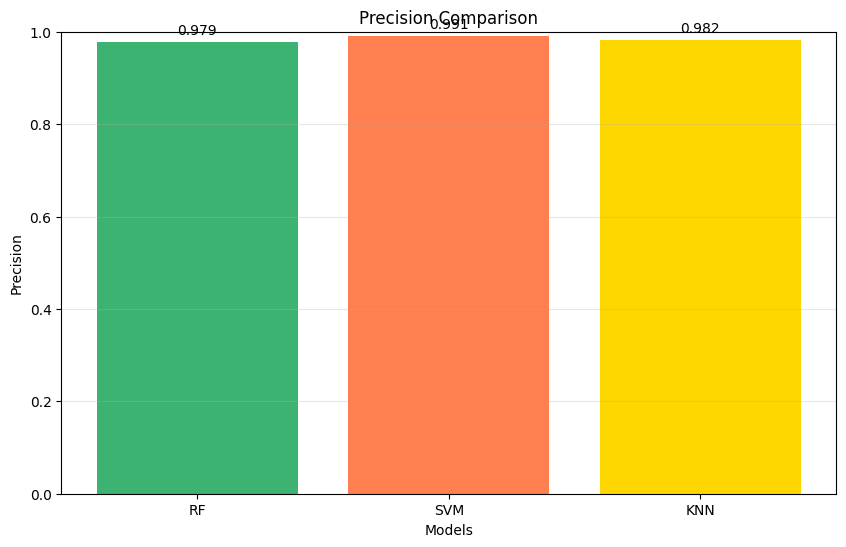

In [208]:
# Precision Comparison
precision_scores = [p_rf, p_svm, p_knn]
title = ['RF', 'SVM', 'KNN']

colors = ['mediumseagreen', 'coral', 'gold']
plt.figure(figsize=(10, 6))
plt.bar(title, precision_scores, color=colors)
plt.title('Precision Comparison')
plt.ylabel('Precision')
plt.xlabel('Models')
plt.grid(axis='y', alpha=0.3)
plt.ylim(0, 1)

# Add precision values on top of bars
for i, v in enumerate(precision_scores):
    plt.text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

plt.show()

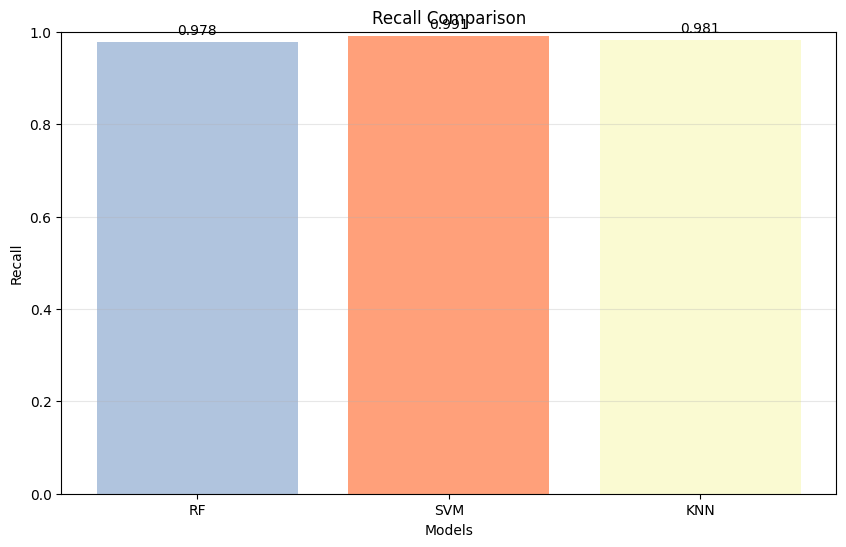

In [209]:
# Recall Comparison
recall_scores = [r_rf, r_svm, r_knn]
title = ['RF', 'SVM', 'KNN']

colors = ['lightsteelblue', 'lightsalmon', 'lightgoldenrodyellow']
plt.figure(figsize=(10, 6))
plt.bar(title, recall_scores, color=colors)
plt.title('Recall Comparison')
plt.ylabel('Recall')
plt.xlabel('Models')
plt.grid(axis='y', alpha=0.3)
plt.ylim(0, 1)

# Add recall values on top of bars
for i, v in enumerate(recall_scores):
    plt.text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

plt.show()